# Linear Regression

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Simple Linear Regression

### Load the data

In [26]:
disease = datasets.load_diabetes()

### Extract data

In [45]:
'''
You should call .reshape() on x because this array must be two-dimensional, or more precisely, 
it must have one column and as many rows as necessary
'''
x_data = disease.data[:, np.newaxis, 2]
y_data = disease.target

np.random.seed(0)
x_data = np.random.rand(100, 1)
y_data = 2 + 3 * x_data + np.random.rand(100, 1)

'''
x_data = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y_data = np.array([5, 20, 14, 32, 22, 38])
'''

'\nx_data = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))\ny_data = np.array([5, 20, 14, 32, 22, 38])\n'

### Split data

In [46]:
# Split Data using scikit-learn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)

### Generate the model and train

In [47]:
lin_reg_model = linear_model.LinearRegression()
lin_reg_model = lin_reg_model.fit(x_train, y_train)

### Predict

In [48]:
y_pred = lin_reg_model.predict(x_test)

### Evaluate results

In [49]:
accuracy = mean_squared_error(y_test, y_pred)
'''
Estimated coefficients or weights (b, c, ...)  y = a + bx1 + cx2 + ...
For 1-d, it is the slope
'''
weights = lin_reg_model.coef_ 
intercept = lin_reg_model.intercept_ # a
coeff_of_determination = lin_reg_model.score(x_test, y_test) #r2
# You can also use r2_score module
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Accuracy: {accuracy}")
print(weights)
print(intercept)
print(coeff_of_determination)
print(r2)

Accuracy: 0.06606897290334086
[[2.93779356]]
[2.55827622]
0.8748432305719217
0.8748432305719217


### Plots

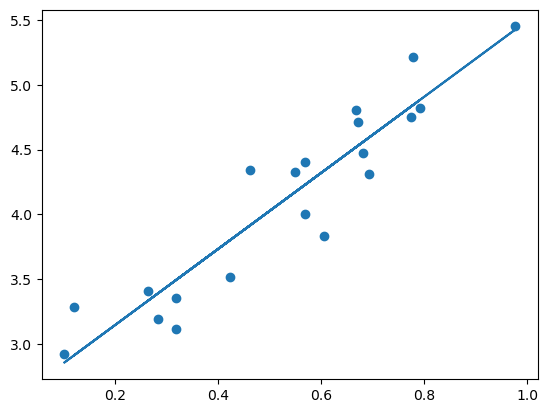

In [51]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)
plt.show()

## Multi-Linear Regression

### Prepare Data

In [121]:
x_data = np.random.rand(100, 2)
y_data = np.add(2.0, np.multiply(3.0, x_data[:, 0]))+ np.random.rand(100)
'''
x = [
    [0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]
]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x_data, y_data = np.array(x), np.array(y)
'''
y_data.shape

(100,)

### Split Data

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)

### Generate the model and train

In [111]:
lin_reg_model = linear_model.LinearRegression()
lin_reg_model = lin_reg_model.fit(x_train, y_train)

### Predict

In [119]:
y_pred = lin_reg_model.predict(x_test)

(20,)

### Evaluate results

In [113]:
accuracy = mean_squared_error(y_test, y_pred)
'''
Estimated coefficients or weights (b, c, ...)  y = a0 + a1 + bx1 + cx2 + ...
For 2-d, it is an array
'''
weights = lin_reg_model.coef_ 
intercept = lin_reg_model.intercept_ # a0, a1
coeff_of_determination = lin_reg_model.score(x_test, y_test) #r2
# You can also use r2_score module
r2 = r2_score(y_test, y_pred)

In [114]:
print(f"Accuracy: {accuracy}")
print(weights)
print(intercept)
print(coeff_of_determination)
print(r2)

Accuracy: 0.08345283780138178
[3.10882927 0.06782162]
2.3805377078829695
0.9264683916850758
0.9264683916850758


In [122]:
x_test[:, 0].shape

(20,)

In [116]:
osman = x_data[:, 0].reshape(-1,1)
y_pred.shape

(20,)

### Plot results

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (100,)  and requested shape (80,)

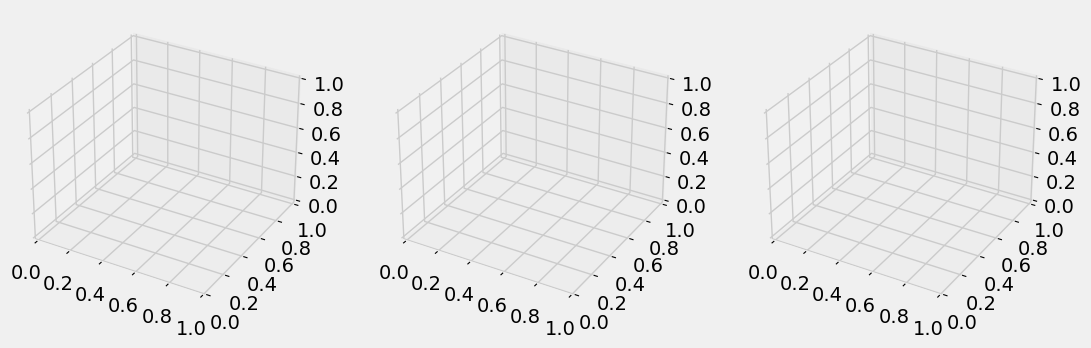

In [118]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x_train[:, 0], x_train[:, 1], y_data, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x_test[:, 0], x_test[:, 1], y_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()


## References
### Simple linear regression
- [Linear Regression in Python](https://realpython.com/linear-regression-in-python/)
- [Linear Regression using Python](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)
### Multi-Linear Regression
- [Multi-Linear Regression Using Python](https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d)
- [How to do Multiple Linear Regression in Python| Jupyter Notebook|Sklearn](https://www.youtube.com/watch?v=WngoqVB6cXw)